## **1. Cài đặt thuật toán**

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def l1_distance(x, y):
    return abs(x - y)

def l2_distance(x, y):
    return (x - y) ** 2

In [13]:
def show_image_inline(img, title="Image"):
    """Utility function to display an image in Jupyter using matplotlib."""
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

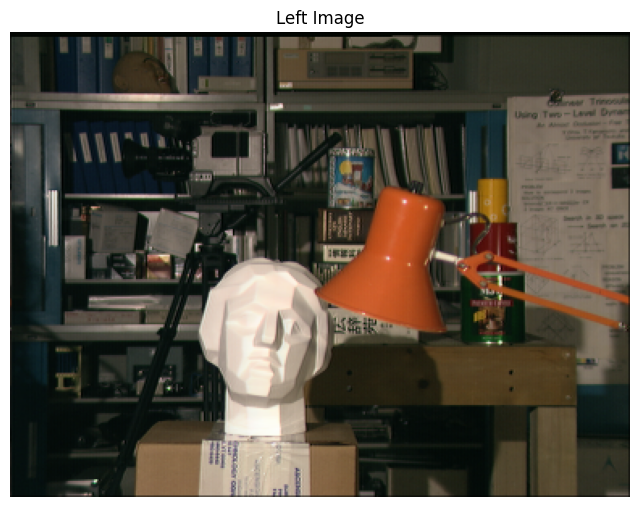

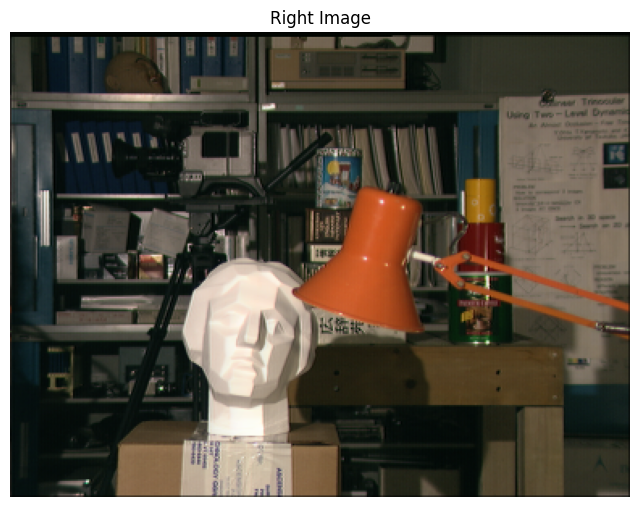

In [14]:
left_img_path1 = 'tsukuba/left.png'
right_img_path1 = 'tsukuba/right.png'
disparity_range1 = 16

# Read images
left1 = cv2.imread(left_img_path1)
right1 = cv2.imread(right_img_path1)

# Display images inline
show_image_inline(left1, "Left Image")
show_image_inline(right1, "Right Image")

In [15]:
def pixel_wise_matching_l1(left_img, right_img, disparity_range, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255

    for y in range(height):
        for x in range(width):
            # Find j where cost has minimum value
            disparity = 0
            cost_min  = max_value

            for j in range(disparity_range):
                cost = max_value if (x - j) < 0 \
                                else l1_distance(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min  = cost
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'pixel_wise_l1.png', depth)
        cv2.imwrite(f'pixel_wise_l1_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth, cv2.applyColorMap(depth, cv2.COLORMAP_JET)

Saving result...
Done.


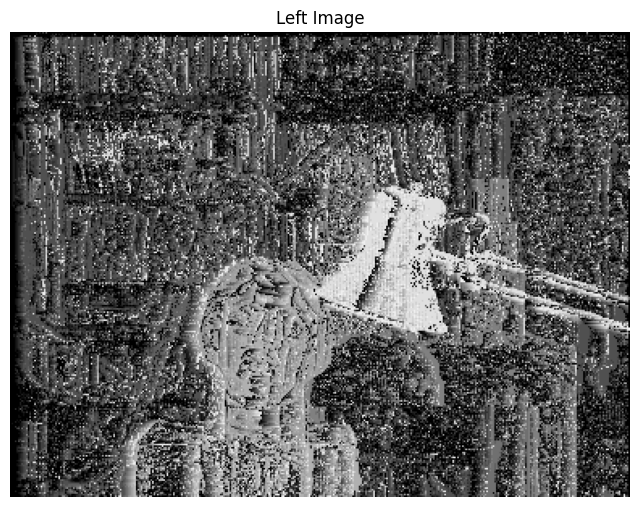

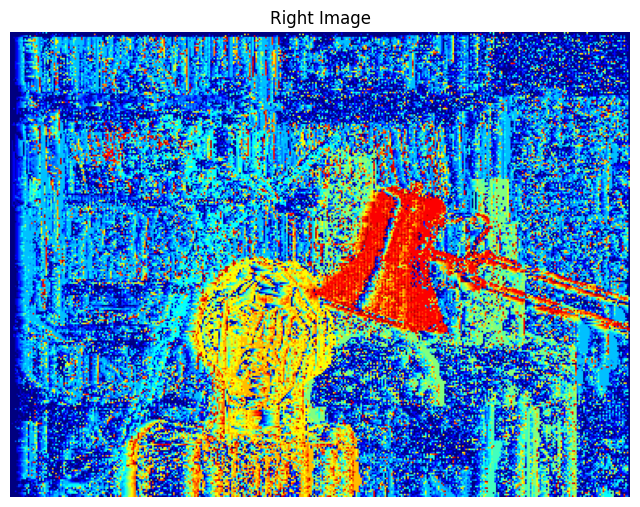

In [16]:
# L1 result
depth1, color1 = pixel_wise_matching_l1(
    left_img_path1,
    right_img_path1,
    disparity_range1,
    save_result=True
)
# Display results inline
show_image_inline(depth1, "Left Image")
show_image_inline(color1, "Right Image")

In [17]:
def pixel_wise_matching_l2(left_img, right_img, disparity_range, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255 ** 2

    for y in range(height):
        for x in range(width):
            # Find j where cost has minimum value
            disparity = 0
            cost_min  = max_value

            for j in range(disparity_range):
                cost = max_value if (x - j) < 0 else l2_distance(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min  = cost
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'pixel_wise_l2.png', depth)
        cv2.imwrite(f'pixel_wise_l2_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth

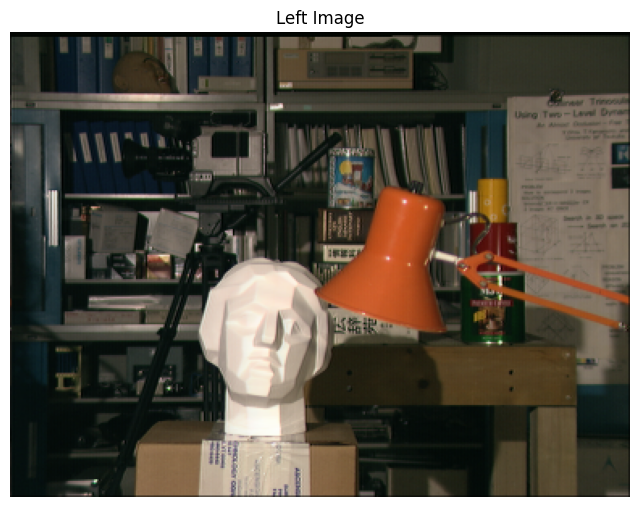

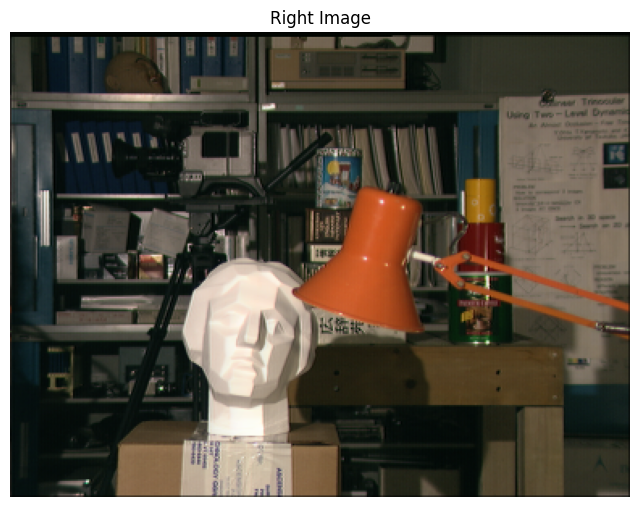

In [18]:
left_img_path2 = 'tsukuba/left.png'
right_img_path2 = 'tsukuba/right.png'
disparity_range2 = 16

left2 = cv2.imread(left_img_path2)
right2 = cv2.imread(right_img_path2)

# Display images inline
show_image_inline(left2, "Left Image")
show_image_inline(right2, "Right Image")

Saving result...
Done.


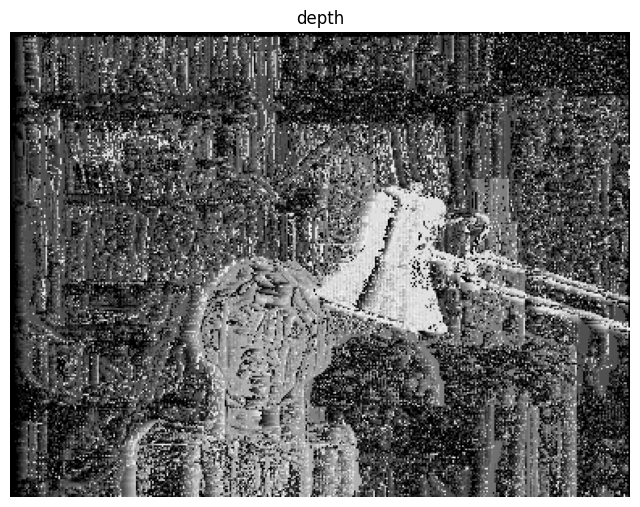

In [19]:
# L1 result
depth11, color11 = pixel_wise_matching_l1(
    left_img_path1,
    right_img_path1,
    disparity_range1,
    save_result=True
)
# Display the colorized depth map
show_image_inline(depth11, "depth")

Saving result...
Done.


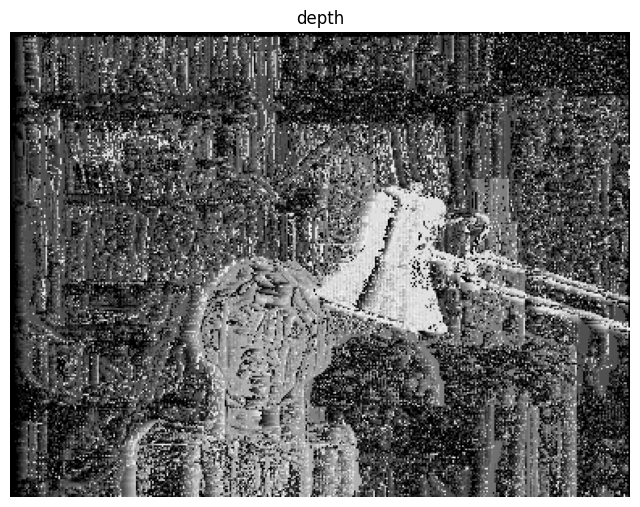

In [20]:
# L2 result
depth = pixel_wise_matching_l2(
    left_img_path2,
    right_img_path2,
    disparity_range2,
    save_result=True
)
show_image_inline(depth, "depth")